In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [2]:
### Step 1: Import the CRYPTO dataset into a Pandas DataFrame.

In [3]:
# Import the Crypto dataset into a Pandas Dataframe

bitcoin_df = pd.read_csv(
    Path("augmento_eth.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
bitcoin_df.head()

/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_58997/1918318170.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bitcoin_df = pd.read_csv(


,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,10.877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01 02:00:00,10.860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2016-11-01 03:00:00,10.744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01 04:00:00,10.716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01 05:00:00,10.761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='date'>

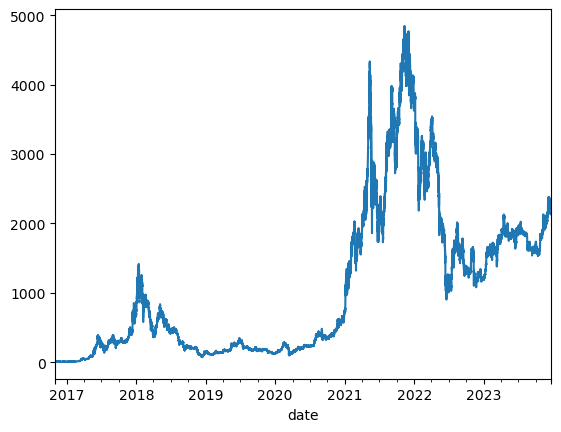

In [4]:
# Plot the actual returns versus the strategy returns
bitcoin_df["listing_close"].plot()

In [5]:
# Group data by daily
#grouped_bitcoin_df = bitcoin_df.groupby(pd.Grouper(key='date', freq='D'))
#grouped_bitcoin_df.head()

In [6]:
# Filter the date index and close columns
#signals_df = bitcoin_df.loc[:, ["listing_close]]
signals_df = bitcoin_df.copy()
signals_df.sort_index(ascending=False)

# Use the pct_change function to generate returns from close prices
signals_df["Actual_Returns"] = signals_df["listing_close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 02:00:00,10.860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.001563
2016-11-01 03:00:00,10.744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010681
2016-11-01 04:00:00,10.716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002606
2016-11-01 05:00:00,10.761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.004199
2016-11-01 06:00:00,10.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001301


In [7]:
### Step 2: Generate trading signals using short- and long-window SMA values. 

In [8]:
# Set the short window and long window
short_window = 1
long_window = 10

# Generate the fast and slow simple moving averages (1 and 10 days, respectively)
signals_df['SMA_Fast'] = signals_df['listing_close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['listing_close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,10.511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,0.0,1.0,0.0,1.0,5.0,0.000381,10.511,10.6818
2016-11-01 12:00:00,10.636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.011892,10.636,10.6594
2016-11-01 13:00:00,10.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,1.0,6.0,0.015701,10.803,10.6653
2016-11-01 14:00:00,10.921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,1.0,0.0,0.0,0.0,2.0,4.0,0.010923,10.921,10.6858
2016-11-01 15:00:00,10.898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,2.0,4.0,-0.002106,10.898,10.6995


In [9]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual_Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual_Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,10.511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,1.0,5.0,0.000381,10.511,10.6818,1.0
2016-11-01 12:00:00,10.636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.011892,10.636,10.6594,1.0
2016-11-01 13:00:00,10.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,6.0,0.015701,10.803,10.6653,1.0
2016-11-01 14:00:00,10.921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,4.0,0.010923,10.921,10.6858,1.0
2016-11-01 15:00:00,10.898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,4.0,-0.002106,10.898,10.6995,-1.0


In [10]:
signals_df['Signal'].value_counts()

Signal
 1.0    31769
-1.0    30695
Name: count, dtype: int64

In [11]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy_Returns'] = signals_df['Actual_Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow,Signal,Strategy_Returns
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,10.511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,5.0,0.000381,10.511,10.6818,1.0,NaN
2016-11-01 12:00:00,10.636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.011892,10.636,10.6594,1.0,0.011892
2016-11-01 13:00:00,10.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,6.0,0.015701,10.803,10.6653,1.0,0.015701
2016-11-01 14:00:00,10.921,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,0.010923,10.921,10.6858,1.0,0.010923
2016-11-01 15:00:00,10.898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,-0.002106,10.898,10.6995,-1.0,-0.002106


In [12]:
### Step 3: Split the data into training and testing datasets.

In [13]:
# Create new feature data frame called X
X = signals_df.drop(['listing_close','Signal','Actual_Returns','Strategy_Returns'], axis=1)
X.shift().dropna()

# Review the DataFrame
X.head()

,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,...,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,SMA_Fast,SMA_Slow
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,2.0,0.0,1.0,0.0,1.0,5.0,10.511,10.6818
2016-11-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.636,10.6594
2016-11-01 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,1.0,0.0,1.0,6.0,10.803,10.6653
2016-11-01 14:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,0.0,0.0,0.0,2.0,4.0,10.921,10.6858
2016-11-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,0.0,0.0,0.0,2.0,4.0,10.898,10.6995


In [14]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(X)
scaled_data


array([[-0.20795039, -0.30004387, -0.29967211, ..., -0.58086648,
        -0.96552837, -0.96536089],
       [-0.20795039, -0.30004387, -0.29967211, ..., -0.86642416,
        -0.96541514, -0.96538118],
       [-0.20795039, -0.30004387, -0.29967211, ..., -0.50947706,
        -0.96526388, -0.96537584],
       ...,
       [-0.20795039, -0.30004387, -0.29967211, ..., -0.43808764,
         1.03505695,  1.02057481],
       [-0.20795039, -0.30004387, -0.29967211, ..., -0.43808764,
         1.03079978,  1.02228697],
       [-0.20795039, -0.30004387, -0.29967211, ..., -0.86642416,
         1.03759313,  1.02394477]])

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=6)

In [16]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca_data = pca.fit_transform(scaled_data)

# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[-4.86965852e+00,  2.07969103e-01, -1.82814949e+00,
        -1.09925480e+00, -2.06111246e-02, -1.41912481e+00],
       [-4.99596165e+00, -2.35689832e+00, -2.03291742e+00,
        -2.27414737e-01, -9.05281393e-01, -7.30331040e-01],
       [-6.04883658e+00,  2.27451984e-01, -1.36028919e+00,
        -5.47626626e-01,  1.07542905e+00, -8.21596053e-01],
       [-4.69357765e+00, -3.61412071e-01, -1.78596776e+00,
        -1.63064942e+00, -1.21762977e+00,  3.56390678e-01],
       [-5.06527960e+00, -2.23498905e-03, -1.03641818e+00,
        -8.63413447e-01,  1.13153850e+00, -5.88744472e-01]])

In [17]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.1438543 , 0.08886031, 0.02602236, 0.01621317, 0.01452718,
       0.01046788])

In [18]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_pca_data, columns=["PC1","PC2","PC3","PC4","PC5","PC6"])
df_market_pca.head(10)

# Copy the crypto names from the original data
df_market_pca["date"] = X.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("date")

# Display sample data
df_market_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
date,,,,,,
2016-11-01 11:00:00,-4.869659,0.207969,-1.828149,-1.099255,-0.020611,-1.419125
2016-11-01 12:00:00,-4.995962,-2.356898,-2.032917,-0.227415,-0.905281,-0.730331
2016-11-01 13:00:00,-6.048837,0.227452,-1.360289,-0.547627,1.075429,-0.821596
2016-11-01 14:00:00,-4.693578,-0.361412,-1.785968,-1.630649,-1.217630,0.356391
2016-11-01 15:00:00,-5.065280,-0.002235,-1.036418,-0.863413,1.131538,-0.588744


In [19]:
X = df_market_pca.copy()
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6
date,,,,,,
2016-11-01 11:00:00,-4.869659,0.207969,-1.828149,-1.099255,-0.020611,-1.419125
2016-11-01 12:00:00,-4.995962,-2.356898,-2.032917,-0.227415,-0.905281,-0.730331
2016-11-01 13:00:00,-6.048837,0.227452,-1.360289,-0.547627,1.075429,-0.821596
2016-11-01 14:00:00,-4.693578,-0.361412,-1.785968,-1.630649,-1.217630,0.356391
2016-11-01 15:00:00,-5.065280,-0.002235,-1.036418,-0.863413,1.131538,-0.588744


In [20]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    31769
-1.0    30695
Name: count, dtype: int64

In [21]:
# Review y head
y.head()

date
2016-11-01 11:00:00    1.0
2016-11-01 12:00:00    1.0
2016-11-01 13:00:00    1.0
2016-11-01 14:00:00    1.0
2016-11-01 15:00:00   -1.0
Name: Signal, dtype: float64

In [22]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2016-11-01 11:00:00


In [23]:
# Select the ending period for the training data with an offset of 48 months
training_end = X.index.min() + DateOffset(months=72)

# Display the training end date
print(training_end)

2022-11-01 11:00:00


In [24]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()
X_train.tail()
X_train.count()

PC1    52508
PC2    52508
PC3    52508
PC4    52508
PC5    52508
PC6    52508
dtype: int64

In [25]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(months=0):]
y_test = y.loc[training_end+DateOffset(months=0):]

# Review the X_test DataFrame
X_test.head()
X_test.tail()
X_test.count()

PC1    9957
PC2    9957
PC3    9957
PC4    9957
PC5    9957
PC6    9957
dtype: int64

In [26]:
### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data.

In [27]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[-0.84310955,  0.12172395, -0.7053436 , -0.45052577,  0.04580841,
        -0.73309458],
       [-0.86220987, -0.36379649, -0.7780968 , -0.06655761, -0.39250538,
        -0.35167691],
       [-1.02143197,  0.12541199, -0.53911478, -0.20758253,  0.58884637,
        -0.40221467],
       ...,
       [-0.75074122,  0.39550239,  0.22295122, -0.0374354 , -0.10348292,
         0.28331421],
       [-0.83145414,  0.40469458,  0.63360324,  0.19822844, -0.16085623,
         0.1472702 ],
       [-0.84644502,  0.38763366,  0.8939093 ,  0.08638832, -0.50724603,
         0.70437623]])

In [28]:
# From SVM, instantiate SVC classifier model instance
from sklearn import svm
from sklearn.metrics import classification_report

svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_train_scaled)

# Review the model's predicted values
svm_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [30]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_training = svm_model.predict(X_train_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_training_report = classification_report(y_train, testing_signal_training)

# Print the classification report
print(svm_training_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.28      0.37     25803
         1.0       0.53      0.78      0.63     26705

    accuracy                           0.53     52508
   macro avg       0.54      0.53      0.50     52508
weighted avg       0.54      0.53      0.50     52508



In [31]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.67      0.57      4893
         1.0       0.51      0.34      0.41      5064

    accuracy                           0.50      9957
   macro avg       0.50      0.50      0.49      9957
weighted avg       0.50      0.50      0.49      9957



In [32]:
### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [33]:
# Create a new empty predictions DataFrame:
predictions_df = pd.DataFrame(index=X_test.index)

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df["Predicted"] = testing_signal_predictions

# Add the actual returns to the DataFrame
predictions_df["Actual_Returns"] = signals_df["Actual_Returns"]

# Add the strategy returns to the DataFrame
predictions_df["Strategy_Returns"] = (
    predictions_df["Actual_Returns"] * predictions_df["Predicted"]
)

# Review the DataFrame
display(predictions_df.tail(10))

,Predicted,Actual_Returns,Strategy_Returns
date,,,
2023-12-21 00:00:00,-1.0,-0.003721,0.003721
2023-12-21 01:00:00,-1.0,0.000683,-0.000683
2023-12-21 02:00:00,-1.0,-0.001411,0.001411
2023-12-21 03:00:00,1.0,0.004330,0.004330
2023-12-21 04:00:00,-1.0,0.000272,-0.000272
2023-12-21 05:00:00,-1.0,-0.002586,0.002586
2023-12-21 06:00:00,-1.0,0.009143,-0.009143
2023-12-21 07:00:00,1.0,0.000361,0.000361
2023-12-21 08:00:00,-1.0,-0.002118,0.002118


In [34]:
### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<Axes: title={'center': 'ETH-PCA3'}, xlabel='date'>

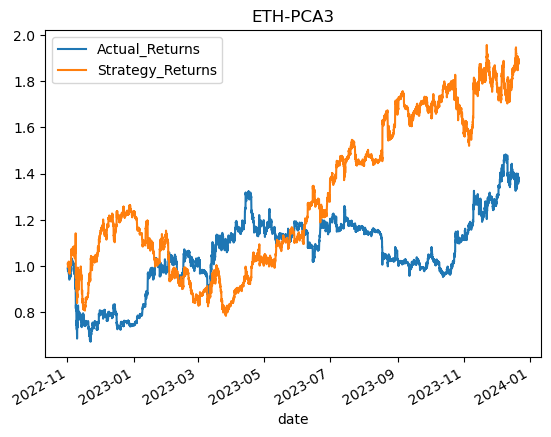

In [35]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual_Returns", "Strategy_Returns"]]).cumprod().plot(title="ETH-PCA3")